<a href="https://colab.research.google.com/github/clemencia/ML4PPGF_UERJ/blob/master/MNIST_keras_CNN_99_55_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

# Trainign batch size 
#batch_size = 128
batch = 20
# Number of training epochs
epochs = 10
# Fraction of the training data to be used as validation
val_split = 0.3
# Learning rate
lr=0.05

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

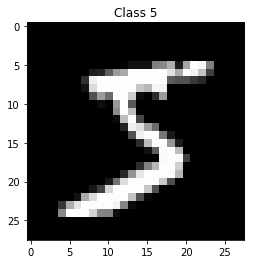

In [0]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [0]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_49 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_50 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_51 (Activation)   (None, 10, 10, 64)       

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
history = model.fit(X_train, Y_train, batch_size=batch, epochs=epochs, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 575us/step - loss: 0.1057 - acc: 0.9677 - val_loss: 0.0396 - val_acc: 0.9874
Epoch 2/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0346 - val_acc: 0.9889
Epoch 3/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0317 - val_acc: 0.9901
Epoch 4/10
60000/60000 [==============================] - 33s 556us/step - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0222 - val_acc: 0.9921
Epoch 5/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0181 - acc: 0.9945 - val_loss: 0.0274 - val_acc: 0.9917
Epoch 6/10
60000/60000 [==============================] - 33s 550us/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.0380 - val_acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0137 - acc: 0.9960 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 1s 113us/step

Test accuracy:  0.9922


10000/10000 [==============================] - 1s 112us/step
Summary: Loss over the test dataset: 0.03, Accuracy: 0.99


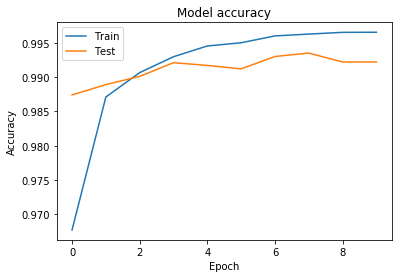

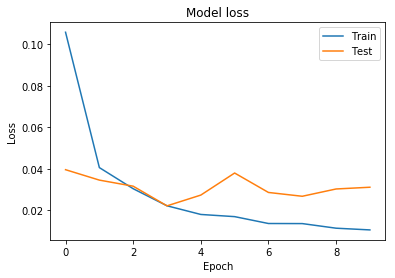

In [0]:
# Training History Visualization
import matplotlib.pyplot as plt

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

(10000, 10)


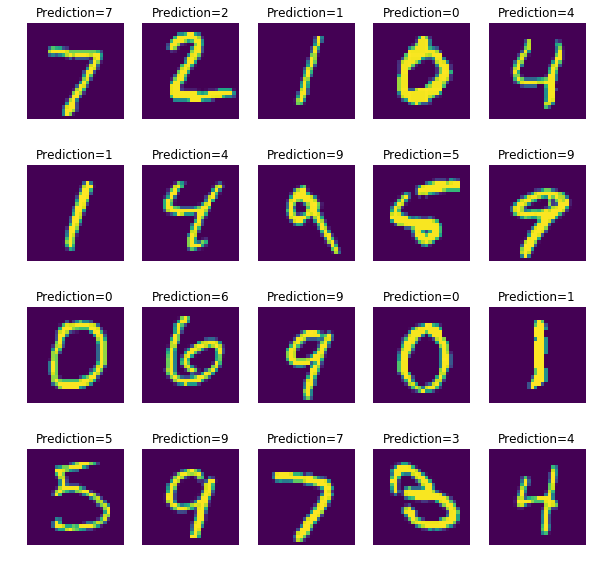

In [0]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test) 
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()